In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
df_purchase = pd.read_csv('dataset/purchase_data.csv')

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Data Segmentation

In [5]:
pca = pickle.load(open('data/pca.pickle', 'rb'))
scaler = pickle.load(open('data/scaler.pickle', 'rb'))
kmeans_pca = pickle.load(open('data/kmeans_pca.pickle', 'rb'))

#### Standardization

In [6]:
features = df_purchase[ ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size'] ]
df_purchase_segm_std = scaler.transform(features)

#### PCA

In [7]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

#### K-means PCA

In [8]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [9]:
df_purchase_predictors = df_purchase.copy()

In [10]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [11]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3


In [12]:
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [13]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence': 'N_Purchases'})

In [14]:
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [15]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [16]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [17]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,3.0
200000002,87,11,0.126437,2.0
200000003,97,10,0.103093,3.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,1.0


#### Segment Proportions

In [18]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.196
3.0,0.378


Text(0.5, 1.0, 'Segment Proportions')

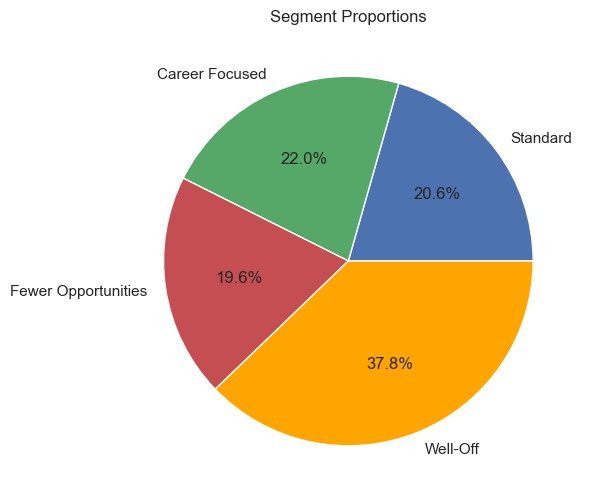

In [19]:
plt.figure(figsize=(9, 6))
plt.pie(
    segm_prop['Segment Proportions'],
    labels=['Standard', 'Career Focused', 'Fewer Opportunities', 'Well-Off'],
    autopct='%1.1f%%',
    colors=('b', 'g', 'r', 'orange')
)
plt.title('Segment Proportions')

#### Purchase Occassion and Purchase Incidence

In [20]:
segment_mean = df_purchase_descr.groupby(['Segment']).mean()
segment_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,117.295918,34.602041,0.284478
3.0,113.730159,22.756614,0.201588


In [21]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

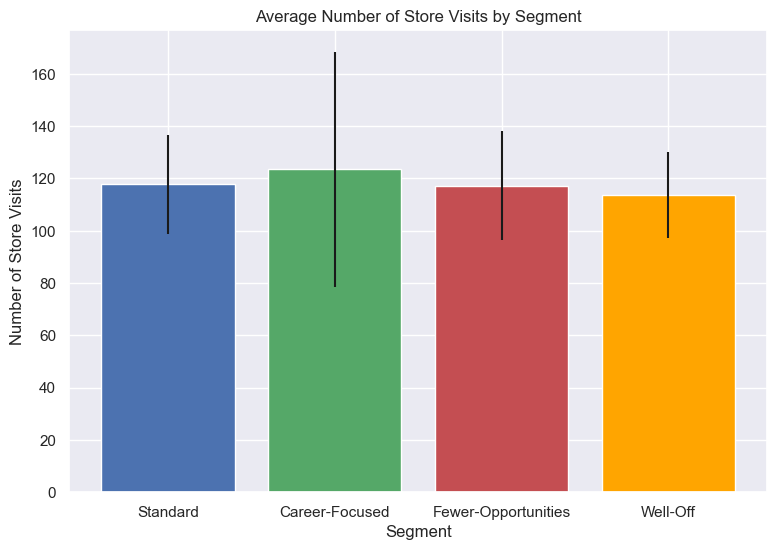

In [22]:
plt.figure(figsize=(9, 6))
plt.bar(
    x = (0,1,2,3),
    tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
    height=segment_mean['N_Visits'],
    yerr=segments_std['N_Visits'],
    color=('b', 'g', 'r', 'orange')
)
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchase Incidences by Segment')

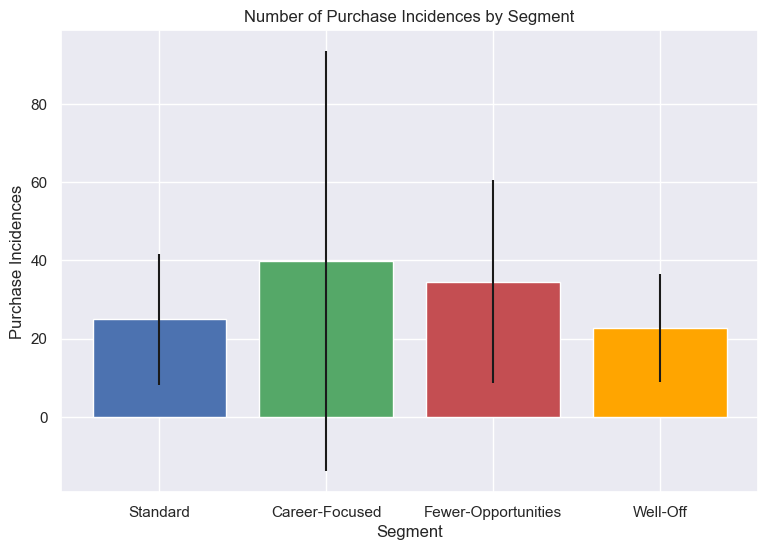

In [23]:
plt.figure(figsize=(9, 6))
plt.bar(
    x = (0,1,2,3),
    tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
    height=segment_mean['N_Purchases'],
    yerr=segments_std['N_Purchases'],
    color=('b', 'g', 'r', 'orange')
)
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchase Incidences by Segment')

#### Brand Choice

In [24]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [25]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand', prefix_sep='_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,3,200000001
11,False,False,False,False,True,3,200000001
19,True,False,False,False,False,3,200000001
24,False,False,False,True,False,3,200000001
29,False,True,False,False,False,3,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,3,200000500
58648,True,False,False,False,False,3,200000500
58674,False,True,False,False,False,3,200000500
58687,False,True,False,False,False,3,200000500


In [26]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [27]:
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()

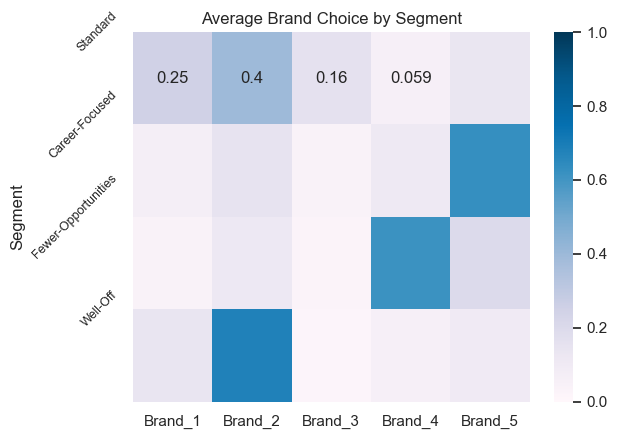

In [28]:
sns.heatmap(
    mean_brand_choice,
    vmin=0,
    vmax=1,
    cmap='PuBu',
    annot=True
)
plt.yticks([0,1,2,3], ['Standard', 'Career-Focused','Fewer-Opportunities', 'Well-Off'], rotation=45, fontsize=9)
plt.title('Average Brand Choice by Segment')
plt.show()

#### Revenue

In [29]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index=False).sum()
segments_brand_revenue

C:\Users\saurabh\AppData\Local\Temp\ipykernel_15672\897477633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,699.47
3,3,2258.90


In [30]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index=False).sum()

C:\Users\saurabh\AppData\Local\Temp\ipykernel_15672\176104719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


In [31]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index=False).sum()


C:\Users\saurabh\AppData\Local\Temp\ipykernel_15672\1557564125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']


In [32]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index=False).sum()

C:\Users\saurabh\AppData\Local\Temp\ipykernel_15672\637102325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']


In [33]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index=False).sum()

C:\Users\saurabh\AppData\Local\Temp\ipykernel_15672\1116607944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']


In [34]:
segments_brand_revenue['Total Revenue'] = (
    segments_brand_revenue['Revenue Brand 1'] + 
    segments_brand_revenue['Revenue Brand 2'] + 
    segments_brand_revenue['Revenue Brand 3'] + 
    segments_brand_revenue['Revenue Brand 4'] + 
    segments_brand_revenue['Revenue Brand 5']
)

In [35]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,699.47,1298.23,731.35,14185.57,5509.69,22424.31
3,3,2258.90,13955.14,716.25,1629.31,2230.50,20790.10


In [36]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({
    0: 'Standard',
    1: 'Career-Focused',
    2: 'Well-Off',
    3: 'Fewer Opportunities'
})

In [37]:
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Fewer Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
